# GTN quickstart for beginners 

GTN is a framework for automatic differentiation with weighted finite-state transducers. The following is a minimal example of building two WFSAs with GTN, constructing a simple function on the graphs, and computing gradients using the python interface.

#### More Resources

Gitbub - https://github.com/facebookresearch/gtn

Documentation - https://gtn.readthedocs.io/en/latest/

Paper - https://arxiv.org/abs/2010.01003

Install GTN 


In [ ]:
!pip install gtn

     |████████████████████████████████| 51kB 1.4MB/s 
  Created wheel for gtn: filename=gtn-0.0.0-cp36-cp36m-linux_x86_64.whl size=554005 sha256=86dbeaf9ee01d2c8a86a0351cc968e12fdd4b4f263804fce89ef481a7740cae2
  Stored in directory: /root/.cache/pip/wheels/52/4e/42/1cab375512e74e8fd09da8a78800f250376941bfc63c6b4525
Successfully built gtn


Importing required libraries

In [ ]:
import gtn
from IPython.display import display, Image

Create simple graphs

In [ ]:
# Make some graphs:
g1 = gtn.Graph()
g1.add_node(True)  # Add a start node
g1.add_node()  # Add an internal node
g1.add_node(False, True)  # Add an accepting node


# Add arcs with (src node, dst node, label):
g1.add_arc(0, 1, 1)
g1.add_arc(0, 1, 2)
g1.add_arc(1, 2, 1)
g1.add_arc(1, 2, 0)


g2 = gtn.Graph()
g2.add_node(True, True)
g2.add_arc(0, 0, 1)
g2.add_arc(0, 0, 0)

1

Visualize the graphs

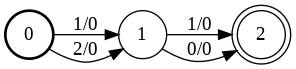

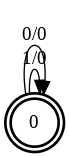

In [ ]:
gtn.draw(g1, "g1.png")
gtn.draw(g2, "g2.png")
display(Image("g1.png"), Image("g2.png"))

Functions on Graphs

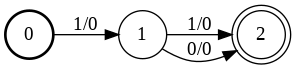

In [ ]:
intersect = gtn.intersect(g1, g2)
gtn.draw(intersect, "intersect.png")
Image("intersect.png")

Backpropagation with Graphs

In [ ]:
score = gtn.viterbi_score(intersect)
gtn.backward(score)

# print gradients of arc weights 
print(g1.grad().weights_to_list()) 

[1.0, 0.0, 1.0, 0.0]
